In [1]:
from TSPGraph import Graph
import numpy as np

In [2]:
graph = Graph('A')

[(1510, 353), (3042, 123), (2145, 389), (1030, 365), (2125, 360), (3121, 1452), (2572, 1989), (755, 1780), (3805, 1161), (2736, 795), (778, 785), (3606, 116), (3348, 1871), (3828, 793), (3947, 1971), (1278, 1463), (3529, 282), (2818, 542), (1184, 1380), (1424, 69), (34, 1105), (1769, 1386), (1187, 1284), (611, 660), (2299, 1689), (524, 935), (3761, 761), (52, 109), (1376, 1308), (2203, 351), (997, 1180), (3587, 1694), (1109, 1824), (3613, 725), (924, 281), (1645, 78), (1032, 882), (728, 505), (1525, 389), (2720, 99), (1014, 436), (2955, 1), (3471, 1985), (1970, 134), (1745, 1827), (2344, 1276), (273, 463), (944, 1404), (3773, 355), (1494, 530), (1812, 325), (3101, 1318), (3809, 652), (1157, 1413), (1238, 1005), (1186, 1152), (88, 1050), (533, 723), (1239, 262), (495, 227), (2704, 801), (334, 1269), (1055, 1629), (377, 314), (183, 867), (1081, 411), (2692, 1857), (2033, 1633), (2658, 1615), (1549, 241), (230, 248), (154, 1204), (3113, 1802), (3421, 1686), (671, 1320), (2993, 313), (1603

In [6]:
np.array(graph.data_frame['cost']).reshape(1,200)

AttributeError: 'Series' object has no attribute 'reshape'

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

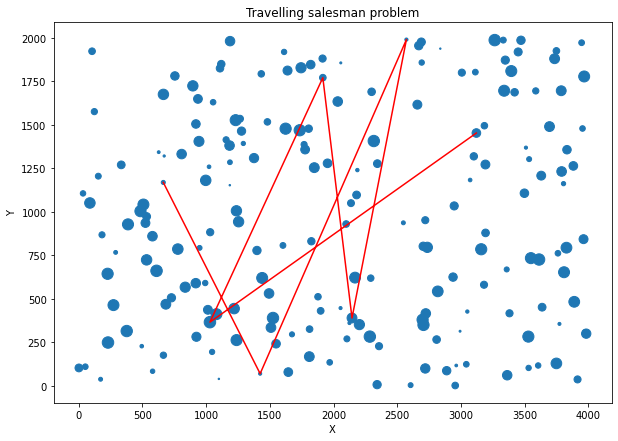

In [3]:
graph.plot(cycle=[5,3,87,2,6,19,113])

In [4]:
%matplotlib notebook
graph.anim_plot([[2,11,35,19,3,87], [2,11,35,19,3,113,87], [2,5,11,35,19,3,113,87]])

<IPython.core.display.Javascript object>